# __Old Cars Data Analysis:__
#### _"What are the main characteristics which have the most impact on the car price?"_

## __0. Data Importation and Preparation__

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Import file into a df
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
cars_df = pd.read_csv(url, header=None)
print("The first five rows of the dataframe") 
cars_df.head(5)

The first five rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
print("The last ten rows of the dataframe") 
cars_df.tail(10)

The last ten rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
# Create headers list and replace them in the dataframe
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
cars_df.columns = headers
cars_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [6]:
cars_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
cars_df.shape

(205, 26)

## __1. Data Wrangling__

In [8]:
cars_df = cars_df.replace('?',np.NaN)

In [9]:
cars_df.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

In [10]:
# Drop the rows with no price value 
cars_df = cars_df.dropna(subset=["price"], axis=0)

In [11]:
# Find "normalized-losses" mean in order to replace the missing values
avg_norm_loss = cars_df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
cars_df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
print("Normalized losses missing values have been replaced by its mean")

Average of normalized-losses: 122.0
Normalized losses missing values have been replaced by its mean


In [12]:
avg_bore = cars_df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
cars_df["bore"].replace(np.nan, avg_bore, inplace=True)
print("Bore missing values have been replaced by its mean")

Average of bore: 3.3307106598984775
Bore missing values have been replaced by its mean


In [13]:
avg_stroke = cars_df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)
cars_df["stroke"].replace(np.nan, avg_stroke, inplace = True)
print("Stroke missing values have been replaced by its mean")

Average of stroke: 3.2569035532994857
Stroke missing values have been replaced by its mean


In [14]:
avg_horsepower = cars_df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
cars_df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
print("Horse power missing values have been replaced by its mean")

Average horsepower: 103.39698492462311
Horse power missing values have been replaced by its mean


In [15]:
avg_peakrpm = cars_df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
cars_df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
print("Peak-rpm missing values have been replaced by its mean")

Average peak rpm: 5117.587939698493
Peak-rpm missing values have been replaced by its mean


In [16]:
# Find where 'num-of-doors' missing values are
np.where(pd.isnull(cars_df['num-of-doors']))

(array([26, 60], dtype=int64),)

In [17]:
cars_df.iloc[[26,60],]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [18]:
# Replace missing values accordingly to the rest of the entry
cars_df["num-of-doors"].replace(np.nan, "four", inplace=True)
cars_df.iloc[[26,60],]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [19]:
cars_df.isnull().sum().sort_values(ascending=False)

symboling            0
normalized-losses    0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
price                0
dtype: int64

### 1.1 Data Formatting

In [20]:
#Convert data types to proper format
cars_df[["bore", "stroke", "price", "peak-rpm"]] = cars_df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
cars_df[["normalized-losses", "horsepower"]] = cars_df[["normalized-losses", "horsepower"]].astype("int")
cars_df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### 1.2 Data Standarization

In [21]:
# Convert fuel consumption from mpg to L/100km
cars_df['highway-mpg'] = 235/cars_df["highway-mpg"]
cars_df.rename(columns={"highway-mpg":'highway-L/100km'}, inplace = True)
cars_df['city-mpg'] = 235/cars_df["city-mpg"]
cars_df.rename(columns={"city-mpg":"city-L/100km"}, inplace = True)
cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


###     1.3 Data Binning

Text(0.5, 1.0, 'Horsepower distribution')

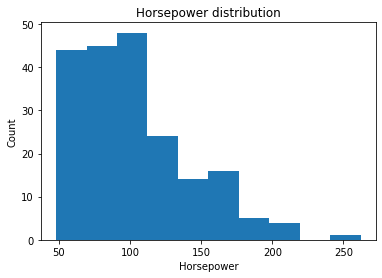

In [22]:
#In order to see what the distribution of horsepower looks like:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cars_df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower distribution")

In [23]:
# To reduce the spectrum
horsepower_bins = np.linspace(min(cars_df["horsepower"]), max(cars_df["horsepower"]), 4)
horsepower_bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [24]:
group_names = ['Low', 'Medium', 'High']
cars_df['horsepower-binned'] = pd.cut(cars_df['horsepower'], horsepower_bins, labels=group_names, include_lowest=True )
cars_df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower bins')

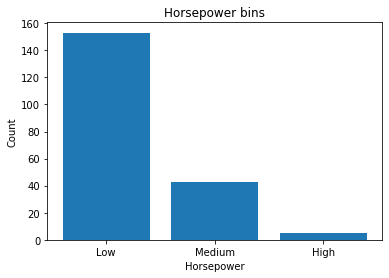

In [25]:
# Plot horsepower bins
pyplot.bar(group_names, cars_df["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower bins")

## __2. Exploratory Data Analysis__

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cars_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.745059,0.783465,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.554726,0.559197,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.036285,0.047199,0.082267


In [28]:
cars_df.corrwith(cars_df['price'])

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543154
stroke               0.082267
compression-ratio    0.071107
horsepower           0.809729
peak-rpm            -0.101542
city-L/100km         0.789898
highway-L/100km      0.801118
price                1.000000
dtype: float64

### 2.1 Visualizing strong correlations (values higher than |0.7|):

(0.0, 47921.36415292104)

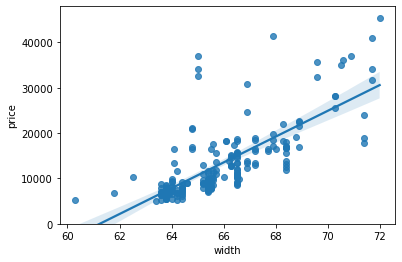

In [29]:
sns.regplot(x="width", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 47757.634717283625)

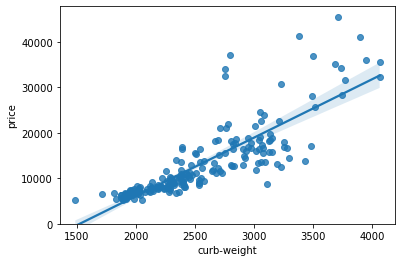

In [30]:
sns.regplot(x="curb-weight", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 53680.39007164217)

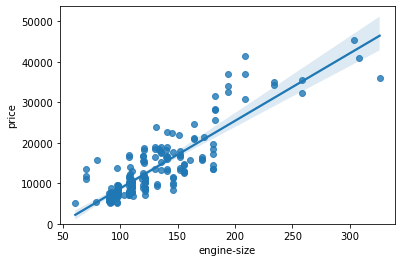

In [31]:
sns.regplot(x="engine-size", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 47537.4003877772)

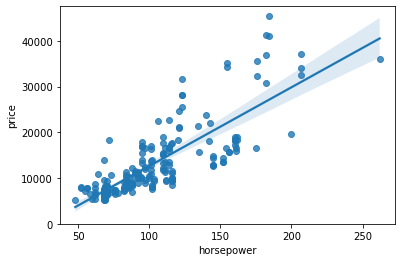

In [32]:
sns.regplot(x="horsepower", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 47715.94062450118)

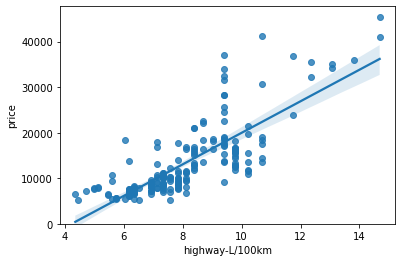

In [33]:
sns.regplot(x="highway-L/100km", y="price", data=cars_df)
plt.ylim(0,)

<AxesSubplot:xlabel='city-L/100km', ylabel='price'>

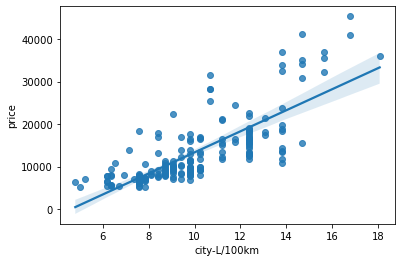

In [34]:
sns.regplot(x="city-L/100km", y="price", data=cars_df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

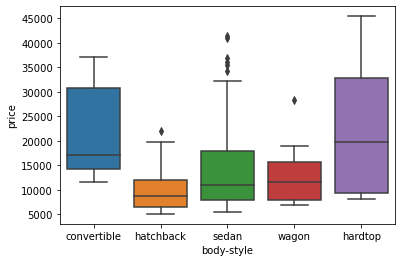

In [35]:
sns.boxplot(x="body-style", y="price", data=cars_df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

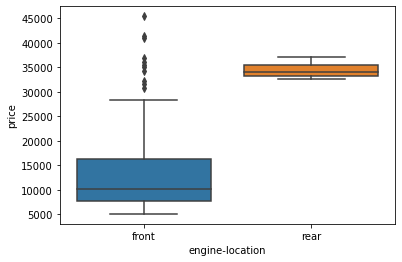

In [36]:
sns.boxplot(x="engine-location", y="price", data=cars_df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

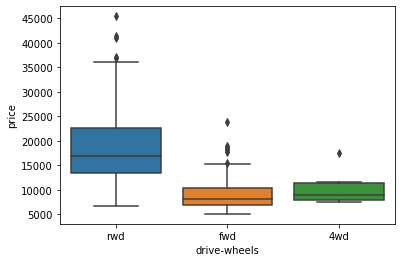

In [37]:
sns.boxplot(x="drive-wheels", y="price", data=cars_df)

### 2.2 Comparing in groups:

In [38]:
df_group_one = cars_df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [39]:
grouped_pivot = df_group_one.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
# Fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

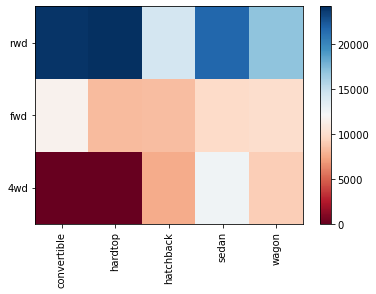

In [41]:
# Plot a heatmap to get a better visualization 

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 2.3 Comparing Correlation and Causation

In [42]:
from scipy import stats

In [43]:
# Finding Pearson Correlation Coefficient and p-value for:

# Width and Price
pearson_coef1, p_value1 = stats.pearsonr(cars_df['width'], cars_df['price'])
# Curb weight and Price
pearson_coef2, p_value2 = stats.pearsonr(cars_df['curb-weight'], cars_df['price'])
# Engine size and Price
pearson_coef3, p_value3 = stats.pearsonr(cars_df['engine-size'], cars_df['price'])
# Horsepower and Price
pearson_coef4, p_value4 = stats.pearsonr(cars_df['horsepower'], cars_df['price'])
# Highway-L/100km and price
pearson_coef5, p_value5 = stats.pearsonr(cars_df['highway-L/100km'], cars_df['price'])
# City-L/100km and price
pearson_coef6, p_value6 = stats.pearsonr(cars_df['city-L/100km'], cars_df['price'])

# Storing the values in a dictonary
corr_and_caus = {'width and price': {'PCC':pearson_coef1,'P-value':p_value1},
                 'curb-weight and price': {'PCC':pearson_coef2,'P-value':p_value2},
                 'engine size and price': {'PCC':pearson_coef3,'P-value':p_value3},
                 'horsepower and price': {'PCC':pearson_coef4,'P-value':p_value4},
                 'highway-L/100km and price': {'PCC':pearson_coef5,'P-value':p_value5},
                 'city-L/100km and price': {'PCC':pearson_coef6,'P-value':p_value6}}

# Making it a df to get a better reading of the values
candc_df = pd.DataFrame(corr_and_caus)
candc_df

,width and price,curb-weight and price,engine size and price,horsepower and price,highway-L/100km and price,city-L/100km and price
PCC,7.512653e-01,8.344145e-01,8.723352e-01,8.097290e-01,8.011176e-01,7.898975e-01
P-value,9.200336e-38,2.189577e-53,9.265492e-64,5.924001e-48,3.046785e-46,3.903106e-44


In [44]:
# Sorting the dataframe by the variables values
sorted_candc_df = candc_df.sort_values(by = ['PCC', 'P-value'], axis = 1, ascending=False)
sorted_candc_df

,engine size and price,curb-weight and price,horsepower and price,highway-L/100km and price,city-L/100km and price,width and price
PCC,8.723352e-01,8.344145e-01,8.097290e-01,8.011176e-01,7.898975e-01,7.512653e-01
P-value,9.265492e-64,2.189577e-53,5.924001e-48,3.046785e-46,3.903106e-44,9.200336e-38


C:\Users\Robert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


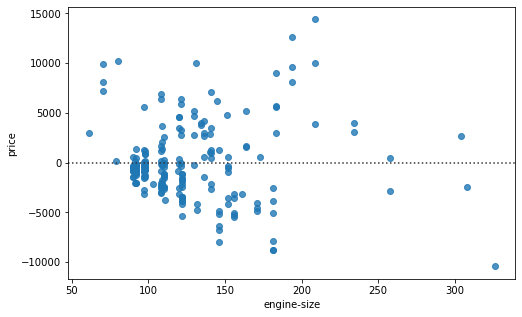

In [45]:
# Making a residual plot between price and engine size
width = 8
height = 5
plt.figure(figsize=(width, height))
sns.residplot(cars_df['engine-size'], cars_df['price'])
plt.show()

## __3. Model Development__

### 3.1 Using Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# Finding the linear regression relationship between price and engine size
lm1 = LinearRegression()
X = cars_df[['engine-size']]
Y = cars_df['price']
lm1.fit(X,Y)
lm1.intercept_

-7963.338906281049

In [48]:
lm1.coef_

array([166.86001569])

In [49]:
Yhat1 = lm1.intercept_ + lm1.coef_*X
Yhat1.head()

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228


In [50]:
# Finding the R^2
model1_rsq = lm1.score(X, Y)
print('The R-square is: ', model1_rsq)

The R-square is:  0.7609686443622008


In [51]:
# Let's calculate the MSE:

# Predict the output:
Yhat=lm1.predict(X)
print('The output of the first four predicted value is:', Yhat1[0:4])

# Import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

# Comparing the predicted results with the actual results:

model1_mse = mean_squared_error(cars_df['price'], Yhat1)
print('The mean square error of price and the predicted value is: ', model1_mse)

The output of the first four predicted value is:     engine-size
0  13728.463134
1  13728.463134
2  17399.383479
3  10224.402804
The mean square error of price and the predicted value is:  15021126.02517414


### 3.2 Using Multiple Linear Regression

In [52]:
Z = cars_df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']]
lm2 = LinearRegression()
lm2.fit(Z, cars_df['price'])
print('The intercet values is: ', lm2.intercept_, 'and the b1, b2, b3, b4 and b5 coefficients values are: ',lm2.coef_)

The intercet values is:  -14475.509882819333 and the b1, b2, b3, b4 and b5 coefficients values are:  [  12.98202961    3.57142146   94.80014628 -484.53470564  913.42773507]


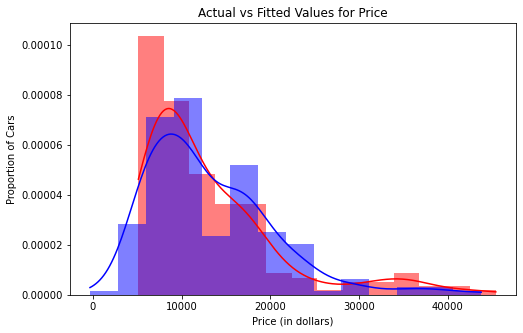

In [53]:
# Using a Histogram to visualize the difference of the distribution between fitted values and actual values
Y_hat = lm2.predict(Z)

plt.figure(figsize=(width, height))
sns.histplot(cars_df['price'], color="red", label="Actual Value", kde=True, stat="density", linewidth=0)
sns.histplot(Y_hat, color="blue", label="Fitted Values", kde=True, stat="density", linewidth=0)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [54]:
# Let's calculate the R^2:

# Fit the model 
lm2.fit(Z, cars_df['price'])

# Find the R^2
model2_rsq = lm2.score(Z, cars_df['price'])
print('The R-square is: ', model2_rsq)

The R-square is:  0.8159493378567997


In [55]:
# Let's calculate the MSE:

# Comparing the predicted results with the actual results:
model2_mse = \
      mean_squared_error(cars_df['price'], Y_hat)
print('The mean square error of price and predicted value using multifit is: ', model2_mse)

The mean square error of price and predicted value using multifit is:  11566048.243724946


### 3.3 Using Polynomial Regression

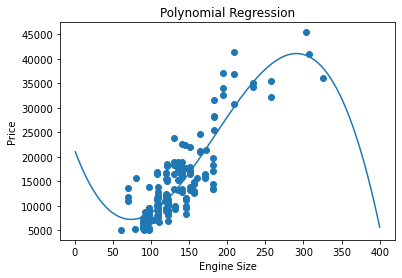

In [56]:
x1 = cars_df['engine-size']
y1 = cars_df['price']

polymodel = np.poly1d(np.polyfit(x1, y1, 4))
polyline = np.linspace(1, 400, 100)

plt.scatter(x1, y1)
plt.plot(polyline, polymodel(polyline))
plt.title('Polynomial Regression')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [57]:
# Let's calculate the R^2:
from sklearn.metrics import r2_score
model3_rsq = r2_score(y1, polymodel(x1))
print('The R-square is: ', model3_rsq)

The R-square is:  0.7901542502358556


In [58]:
# Let's calculate the MSE:
model3_mse = mean_squared_error(y1, polymodel(x1))
print('The MSE is: ', model3_mse)

The MSE is:  13187054.245011818


### 3.4 Using a Pipeline

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [60]:
# Creating a list of tuples to input as an argument to the pipeline constructor:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)

Z = Z.astype(float) # convert the data type to float to avoid errors

pipe.fit(Z,y1)
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13069.0714197 , 13069.0714197 , 19986.36625849,  9809.37194773])

### 3.5 Comparing results of the different models:

In [61]:
print('Model 1: Linear Regression. \nThe r-squared value is: ', model1_rsq,'and the mse is: ', model1_mse,
      '\nModel 2: Multiple Linear Regression. \nThe r-squared value is: ', model2_rsq,'and the mse is: ', model2_mse,
      '\nModel 3: Polynomial Regression. \nThe r-squared value is: ', model3_rsq,'and the mse is: ', model3_mse)

Model 1: Linear Regression. 
The r-squared value is:  0.7609686443622008 and the mse is:  15021126.02517414 
Model 2: Multiple Linear Regression. 
The r-squared value is:  0.8159493378567997 and the mse is:  11566048.243724946 
Model 3: Polynomial Regression. 
The r-squared value is:  0.7901542502358556 and the mse is:  13187054.245011818


## __4. Model Evaluation__

In [62]:
#Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

#Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [63]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### 4.1 Training and Testing

In [64]:
y_data = cars_df['price']
x_data = cars_df.drop('price',axis=1)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#Using 10% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 21
Number of training samples: 180


In [67]:
#Creating a Linear Regression object and fitting the model using the feature "horsepower" for :
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [68]:
#Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36339478087886834

In [69]:
#Let's calculate the R^2 on the training data.
lre.score(x_train[['horsepower']], y_train)

0.6622424809407366

In [70]:
#Using 30% for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
print("Number of test samples :", x_test1.shape[0])
print("Number of training samples:",x_train1.shape[0])

Number of test samples : 61
Number of training samples: 140


In [71]:
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.6961013584695803

In [72]:
lre.score(x_train1[['horsepower']], y_train1)

0.5970171187604645

### 4.2 Cross-Validation Score

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [74]:
#Using 4 folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [75]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5222467481979471 and the standard deviation is 0.2917623074182636


In [76]:
#Using 3 folds
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=3)
Rcross1

array([0.69056537, 0.61006512, 0.20956081])

In [77]:
print("The mean of the folds are", Rcross1.mean(), "and the standard deviation is" , Rcross1.std())

The mean of the folds are 0.5033971017779334 and the standard deviation is 0.21035667780042153


In [78]:
#Using 5 folds
Rcross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=5)
Rcross2

array([ 0.73783959,  0.5600724 , -0.08130909,  0.8786272 , -0.16330413])

In [79]:
print("The mean of the folds are", Rcross2.mean(), "and the standard deviation is" , Rcross2.std())

The mean of the folds are 0.38638519395991683 and the standard deviation is 0.4282256238725921


In [80]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

### 4.3 Overfitting, Underfitting and Model Selection

In [81]:
#Creating Multiple Linear Regression objects and training the model
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']], y_train)

LinearRegression()

In [82]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
yhat_train[0:5]

array([ 7505.63999997, 29126.72449992, 15590.30956413,  3222.01697157,
       35327.98102162])

In [83]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
yhat_test[0:5]

array([11107.81647401,  5978.54117041, 11579.0307139 ,  6194.95038928,
       15272.29765417])

C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


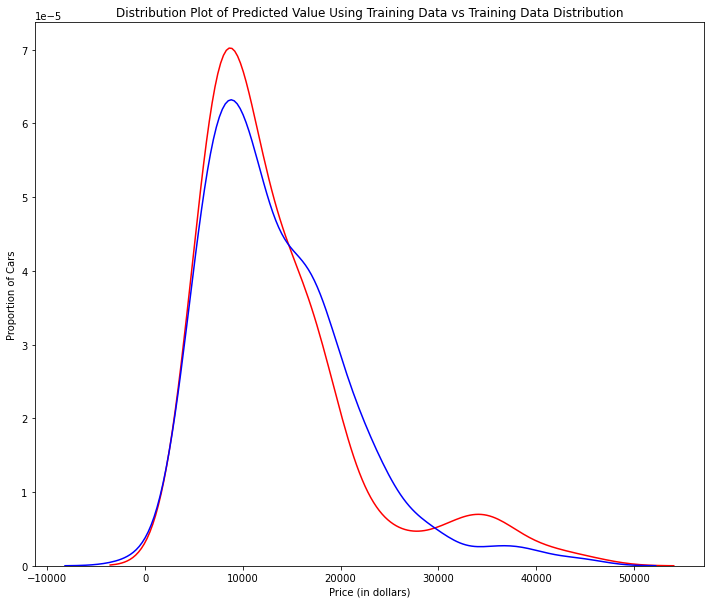

In [84]:
# Examining the distribution of the predicted values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


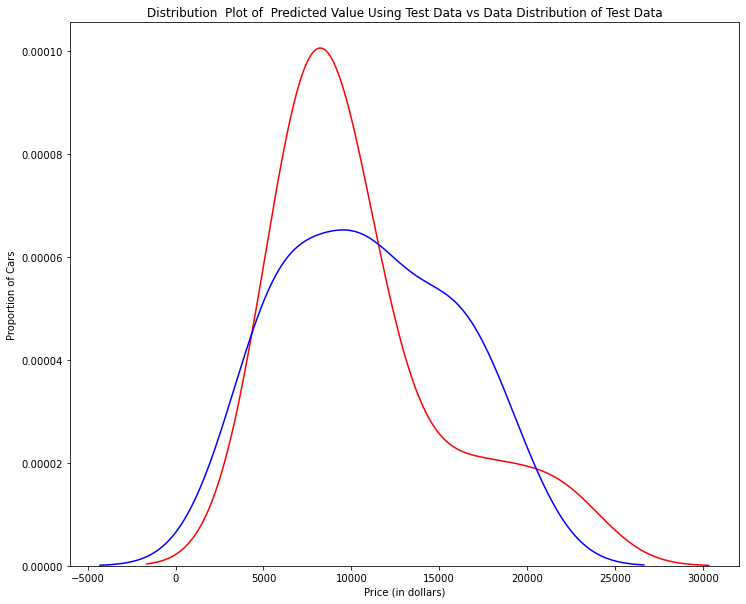

In [85]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [87]:
# Performing polynomial transformations with more than one feature
from sklearn.preprocessing import PolynomialFeatures
pr1=PolynomialFeatures(degree=2)

In [90]:
# Transforming the training and testing samples for the following features
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
x_train_pr1.shape

(180, 21)

C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


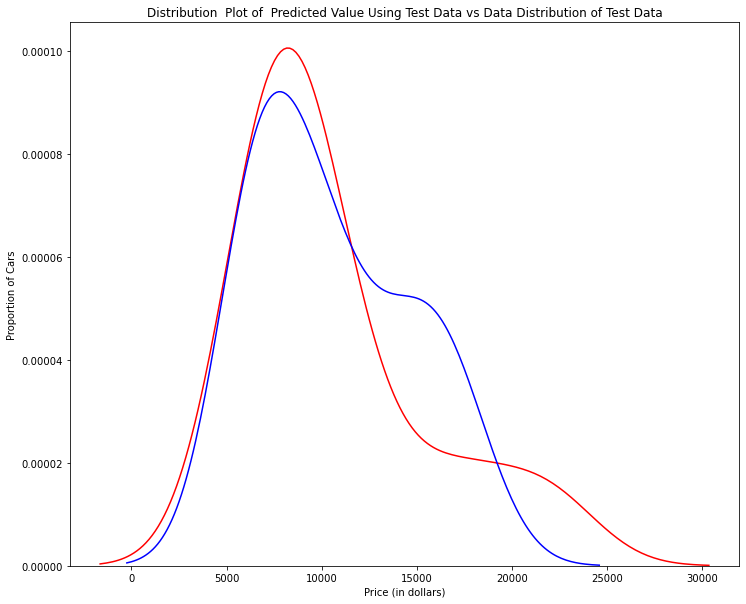

In [91]:
# Creating a linear regression model "poly1"
poly1=LinearRegression().fit(x_train_pr1,y_train)

# Predicting an output on the polynomial features
yhat_test1=poly1.predict(x_test_pr1)

# Using the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [94]:
# The predicted value is lower than actual value for cars where the price is in between $5,000 and $10,000.
# The predicted price is higher than the price cost in the $10,000 to $20,000 range and lower from then on.
# As such the model is not as accurate in these ranges.

### 4.4 Ridge Regression

In [97]:
from sklearn.linear_model import Ridge

In [96]:
# Performing a degree two polynomial transformation on the data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])

In [98]:
# Creating a Ridge regression object, setting the regularization parameter (alpha) to 0.1 and fitting the model
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [99]:
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [10111.08972752  7278.621415   10209.34451418  5412.62098705]
test set : [ 9549.  6229. 10245.  7295.]


In [100]:
# Selecting the value of alpha that minimizes the test error
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 117.64it/s, Test Score=0.681, Train Score=0.856]


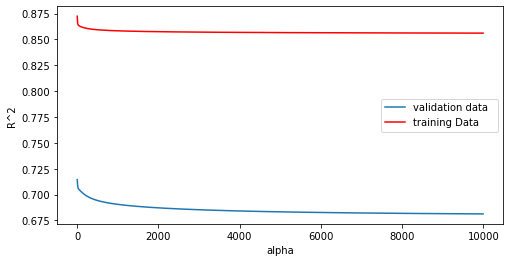

In [104]:
# Plotting out the value of R^2 for different alphas:

width = 8
height = 4
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [105]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7087766340306974

### 4.5 Grid Search

In [106]:
from sklearn.model_selection import GridSearchCV

In [108]:
# Creating a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [109]:
# Creating a Ridge regression object:
RR=Ridge()

In [111]:
# Creating a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fitting the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [112]:
# Obtaining the estimator with the best parameters and assigning it to the variable BestRR
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [114]:
# Testing the model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_test)

0.6361490026086496

In [116]:
# Performing a grid search for the alpha parameter and the normalization parameter, and finding the best values of the parameters:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']],y_data)
Grid2.best_estimator_

Ridge(alpha=1, normalize=True)